# Recursive Feature Elimination
- Works on external machine learning model like Linear Regression or Random Forest

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

In [19]:
X.shape

(569, 30)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [16]:
y_pred = model.predict(X_test)

In [17]:
accuracy_score(y_test, y_pred)

0.9707602339181286

In [20]:
estimator = LogisticRegression(max_iter=5000)
rfe = RFE(estimator=estimator, n_features_to_select=10)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=5000), n_features_to_select=10)

In [31]:
# X_new = X.loc[:, rfe.support_]
selected_features = X.columns[rfe.support_]
selected_features

Index(['mean radius', 'mean compactness', 'mean concavity',
       'mean concave points', 'perimeter error', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry'],
      dtype='object')

In [32]:
new_model = LogisticRegression(max_iter=5000)
new_model.fit(X_train[selected_features], y_train)

LogisticRegression(max_iter=5000)

In [33]:
y_pred = new_model.predict(X_test[selected_features])

In [34]:
accuracy_score(y_test, y_pred)

0.9415204678362573

In [38]:
df = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')
df.head()

,Feature,Ranking
0,mean radius,1
24,worst smoothness,1
28,worst symmetry,1
12,perimeter error,1
25,worst compactness,1


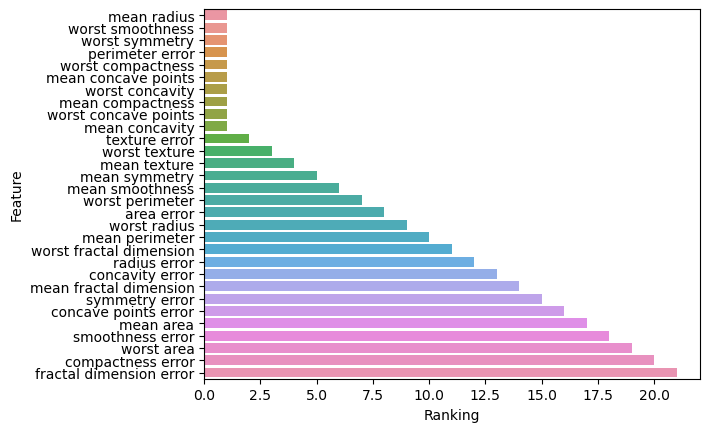

In [47]:
sns.barplot(data=df, x='Ranking', y='Feature')
plt.show()